In [1]:
import math
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# 1. derivative of a scalar
1-D data, int, float

https://en.wikipedia.org/wiki/Derivative

at x: 

$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h} $$

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3)

20

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

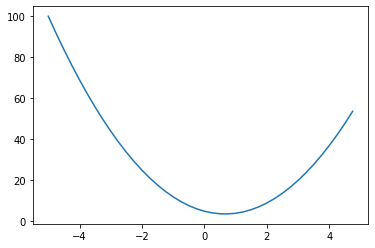

In [5]:
plt.plot(xs, ys)

In [6]:
def grad(x, h=1e-4):
    return (f(x+h)-f(x))/h

In [7]:
grad(3)

14.000300000063248

In [8]:
grad(-3)

-21.999700000066014

In [9]:
# we can solve this function and 2/3 is the root 
grad(2./3)

0.0002999999981767587

# 2. derivative of multiple scalars

In [10]:
a = 2.0
b = -3.0
c = 10.0
def f3(a,b,c):
    return a*b + c
print (f3(a,b,c))

4.0


In [11]:
def grad_a(a, b, c, h=1e-4):
    return (f3(a+h, b, c)-f3(a, b, c))/h
grad_wrt_a = grad_a(a, b, c)
grad_wrt_a 

-3.000000000010772

In [12]:
def grad_b(a, b, c, h=1e-4):
    return (f3(a, b+h, c)-f3(a, b, c))/h
grad_wrt_b = grad_b(a, b, c)
grad_wrt_b 

2.0000000000042206

## Exercises

In [13]:
# here is a mathematical expression that takes 3 inputs and produces one output
from math import sin, cos

def f(a, b, c):
    return -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5

print(f(2, 3, 4))

6.336362190988558


In [14]:
# write the function df that returns the analytical gradient of f
# i.e. use your skills from calculus to take the derivative, then implement the formula
# if you do not calculus then feel free to ask wolframalpha, e.g.:
# https://www.wolframalpha.com/input?i=d%2Fda%28sin%283*a%29%29%29

def gradf(a, b, c):
    dfa = -3*a**2 - 0.5 * a**-0.5
    dfb = 3 * cos(3*b) + 2.5 * b**1.5
    dfc = c**-2
    return [dfa, dfb, dfc] 

In [15]:
# expected answer is the list of 
ans = [-12.353553390593273, 10.25699027111255, 0.0625]
yours = gradf(2, 3, 4)
for dim in range(3):
    ok = 'OK' if abs(yours[dim] - ans[dim]) < 1e-5 else 'WRONG!'
    print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {yours[dim]}")

OK for dim 0: expected -12.353553390593273, yours returns -12.353553390593273
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027111255
OK for dim 2: expected 0.0625, yours returns 0.0625


In [16]:
# now estimate the gradient numerically without any calculus, using
# the approximation we used in the video.
# you should not call the function df from the last cell

h = 1e-8
a = 2
b = 3
c = 4
def grad_wrt_a(a):
    return (f(a+h, b, c)-f(a, b, c))/h
def grad_wrt_b(b):
    return (f(a, b+h, c)-f(a, b, c))/h
def grad_wrt_c(c):
    return (f(a, b, c+h)-f(a, b, c))/h

# -----------
numerical_grad = [grad_wrt_a(a), grad_wrt_b(b), grad_wrt_c(c)]
# -----------

for dim in range(3):
    ok = 'OK' if abs(numerical_grad[dim] - ans[dim]) < 1e-5 else 'WRONG!'
    print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353553380251014
OK for dim 1: expected 10.25699027111255, yours returns 10.256990368162633
OK for dim 2: expected 0.0625, yours returns 0.0624999607623522


In [17]:
# there is an alternative formula that provides a much better numerical 
# approximation to the derivative of a function.
# learn about it here: https://en.wikipedia.org/wiki/Symmetric_derivative
# implement it. confirm that for the same step size h this version gives a
# better approximation.

h = 1e-8
a = 2
b = 3
c = 4
def grad_wrt_a2(a):
    return (f(a+h, b, c)-f(a-h, b, c))/(2*h)
def grad_wrt_b2(b):
    return (f(a, b+h, c)-f(a, b-h, c))/(2*h)
def grad_wrt_c2(c):
    return (f(a, b, c+h)-f(a, b, c-h))/(2*h)

# -----------
numerical_grad2 = [grad_wrt_a2(a), grad_wrt_b2(b), grad_wrt_c2(c)]
# -----------

for dim in range(3):
    ok = 'OK' if abs(numerical_grad2[dim] - ans[dim]) < 1e-5 else 'WRONG!'
    print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad2[dim]}")

OK for dim 0: expected -12.353553390593273, yours returns -12.353553291433172
OK for dim 1: expected 10.25699027111255, yours returns 10.256990368162633
OK for dim 2: expected 0.0625, yours returns 0.0624999607623522


# 3. forward pass

In [18]:
# Value is a node in a graph
class Value:
    
    # left to right, right is parent (root), left is children (leaf).
    # children: tuple of Value
    # tuples are immutable as opposed to lists which are mutable 
    # once the graph is created, the structure is immutable 
    def __init__(self, data, _children=(), _op='', label=''):
        # data can only be int or float
        self.data = data
        # init gradient as 0, we should zero_grad each time after we do backward propagation 
        self.grad = 0.0
        # chain rule function
        # backward is called from the last node
        self._backward = lambda: None 
        # previous node that is connected to the current node, previous nodes are children of the current node
        # child node is Value
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    # The repr() function returns a printable representation of the given object.
    # without it, Value() will return a pointer <__main__.Value at 0x10d8db3c8>
    def __repr__(self):
        return f"Value(data={self.data}, _op={self._op}, label={self.label})"
    
    # a+b => a.__add__(b)
    # other is Value
    def __add__(self, other):
        # if other is an instance of Value, use it; otherwise, wrap it => 1 -> Value(1)
        other = other if isinstance(other, Value) else Value(other)
        
        # return type is Value
        # out is the output (next node) of this and other
        # the children/previous nodes of "out" are self and other
        out = Value(self.data + other.data, (self, other), '+')
        
        # set the gradient for self and others when we chain rule it
        def _backward():
            # assume we know out.grad already, because it is backward!
            # a+b gradient wrt to a is 1.0
            # Bug warning: 
            # using the gradient chain rule, we could use equal: self.grad = 1.0 * out.grad 
            # however, if self = other (i.e. a+a), other.grad = 1.0 * out.grad will essentially overwrite self.grad 
            # resulting in incorrect grad of 1 instead of 2 wrt a
            # to fix this bug, change = to +=, contribution from out.grad will be used to update the child node
            # gradients will be accumulated
            self.grad += 1.0 * out.grad 
            other.grad += 1.0 * out.grad 
            
        # set the out node backward function as defined in __add__
        # _backward is a function, assign function, not value. WRONG out._backward = _backward()
        out._backward = _backward
        return out
    
    # other is Value
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)

        # the children/previous nodes of "out" are self and other
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            # a*b gradient wrt to a is b
            self.grad += other.data * out.grad 
            other.grad += self.data * out.grad 

        out._backward = _backward
        return out
    
    # rmul => a*b = b*a
    # https://stackoverflow.com/questions/5181320/under-what-circumstances-are-rmul-called
    # if cannot do b*a, it will check a*b
    # other is Value
    def __rmul__(self, other):
        return self * other
        
    # activation function, non-linear
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        
        # tanh takes a single input self, so the child of tanh is just self
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
        # tanh derivative = 1 - t**2
            self.grad += (1 - t**2) * out.grad
            
        out._backward = _backward
        return out

    # softmax takes in a list of Value
    def softmax(self, xs):
        current = self.exp()
        sum_res = sum([x.exp() for x in xs])
        out = Value(current/sum_res, (self, ), 'softmax')
        def _backward():
            self.grad += out.data*(1-out.data) * out.grad
        out._backward = _backward
        return out
    
    def log(self):
        # self.data is not 0
        assert abs(self.data)>1e-8
        out = Value(math.log(self.data), (self,), 'log')
        def _backward():
            self.grad += (1./self.data) * out.grad
        out._backward = _backward
        return out
        
        
    # we could also further break down tanh into an exp operator 
    def exp(self):
        x = self.data
        
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            # exp derivative is exp
            self.grad += out.data * out.grad
            
        out._backward = _backward
        return out
    
    # we already have *, which is __mul__
    # a/b = a * b**(-1)
    # other is Value
    def __truediv__(self, other):
        return self * other**-1
    
    def __neg__(self):
        return self * -1 
    
    # other is Value
    def __sub__(self, other):
        return self + (-other)
    
    # power function self ** other
    # other is int, float
    def __pow__(self, other):
        # power: other has to be int or float
        assert isinstance(other, (int, float))
        
        # can directly use the ** built in python, wrap it in Value
        out = Value(self.data**other, (self, ), f'**{other}')
        
        def _backward():
            self.grad += other * (self.data**(other - 1)) * out.grad
            
        out._backward = _backward
        return out
    
    # the real backward function
    def backward(self):
        # Topological Sorting: left to right, children to parent
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                # parent node will be added only after all the children (leaf) nodes are processed and added
                topo.append(v)
                
        # build from the root node
        build_topo(self)
        
        # we need to initialize the root.grad first to be multiplied in the chain rule
        self.grad = 1.0
        
        # backward function from the root to children 
        for node in reversed(topo):
            # if a node has children, its children grad is calculated by _backward
            # calling the function _backward() to update the gradient 
            node._backward()

In [19]:
# visualize graph
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':"LR"})
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the node, create a rec shape
        dot.node(name = uid, label = "%s | {data %.4f} | {grad %.4f} "%(n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is of some op, create an op node 
            dot.node(name=uid+n._op, label=n._op)
            # connect op node to the value node 
            dot.edge(uid+n._op, uid)
    
    for n1, n2 in edges:
        # connect to the op node of n2?
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
                 
    return dot

In [20]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e=a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L' # L = (a*b + c) * f

In [21]:
d._prev

{Value(data=-6.0, _op=*, label=e), Value(data=10.0, _op=, label=c)}

In [22]:
d._op

'+'

In [23]:
a + b

Value(data=-1.0, _op=+, label=)

In [24]:
a.__add__(b)

Value(data=-1.0, _op=+, label=)

In [25]:
a*b + c

Value(data=4.0, _op=+, label=)

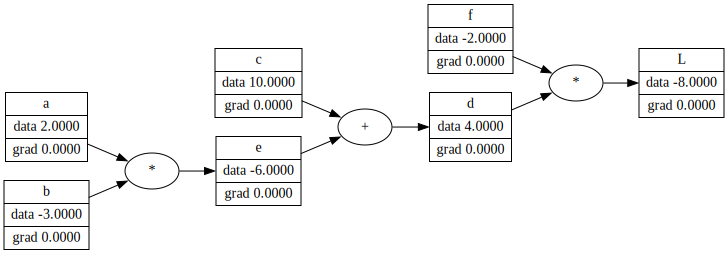

In [26]:
# all gradients are initialized as 0
# L = (a*b + c) * f
draw_dot(L)

In [27]:
# manually calculate gradient of each node 
def grad_wrt_a():
    h = 1e-5
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e=a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data
    
    a = Value(2.0+ h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0 , label='c')
    e=a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L  = d * f; L.label='L'
    L2 = L.data
    
    print ((L2-L1)/h)
    
grad_wrt_a()

6.000000000128124


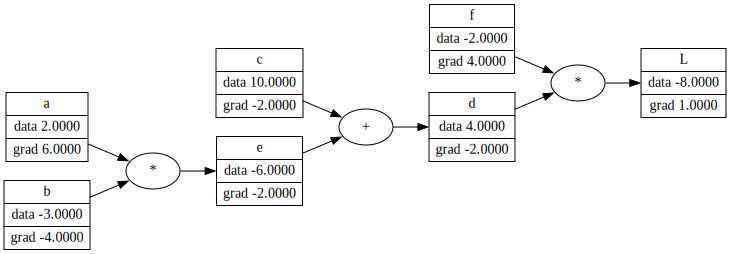

In [28]:
# manually calcualte the gradient of each node with the chain rule
L.grad = 1.0
# chain rule
# dL/dd = f
# dL/dc ?
# dd/dc = 1.0
# dL/dc = dL/dd * dd/dc = f * 1

f.grad = d.data
d.grad = f.data
c.grad = d.grad * 1.0
e.grad = d.grad * 1.0 
b.grad = e.grad * a.data
a.grad = e.grad * b.data
draw_dot(L)

# 4. automatic differentiation with the chain rule

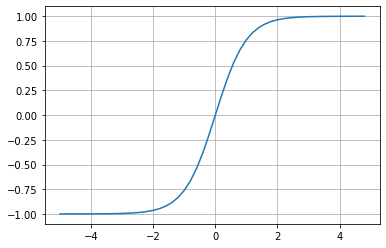

In [29]:
# squash to -1 to 1 Hyperbolic function
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)))
# show with grid
plt.grid()

In [30]:
# input neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias
b = Value(6.881373, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

# cell body agg input
n = x1w1x2w2 + b; 
n.label = 'n'

o = n.tanh(); o.label='o'

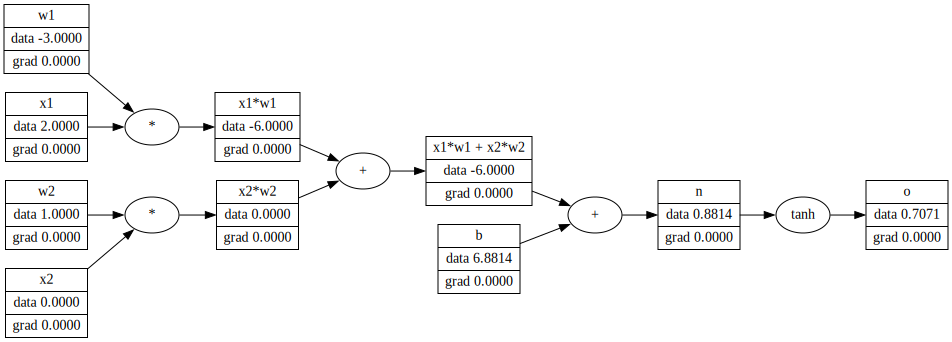

In [31]:
draw_dot(o)

In [32]:
o._op

'tanh'

In [33]:
# o's children is n
o._prev

{Value(data=0.881373, _op=+, label=n)}

In [34]:
n._prev

{Value(data=-6.0, _op=+, label=x1*w1 + x2*w2),
 Value(data=6.881373, _op=, label=b)}

In [35]:
# o.grad is init as 0 by default
o.grad = 1.0
# n.tanh() -> o. n is self, o is a Value
# o._backward(): calling _backward on the parent node updates the children's gradient
# children nodes are stored in the tuple (self, )
# children grad += (1 - t**2) * out.grad
o._backward()

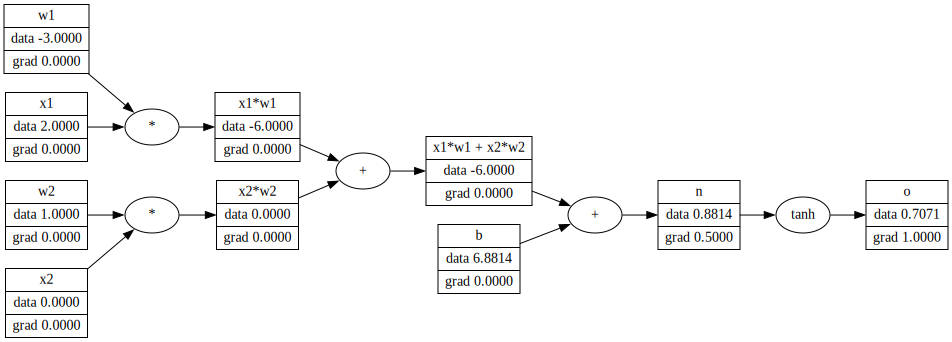

In [36]:
draw_dot(o)

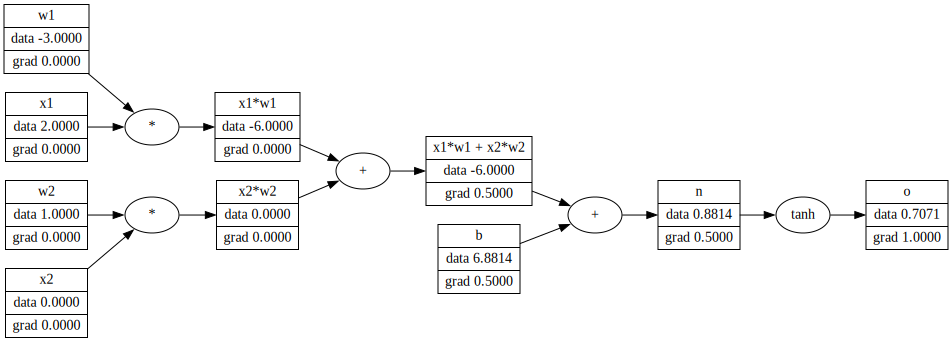

In [37]:
n._backward()
draw_dot(o)

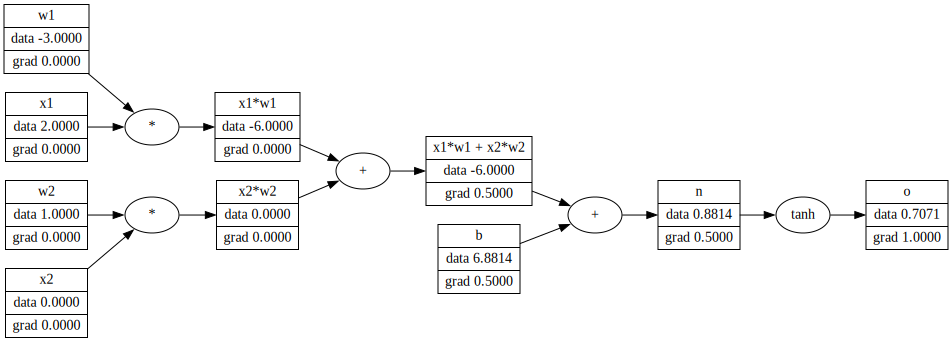

In [38]:
# b is a leaf node, nothing happens upstream
b._backward()
draw_dot(o)

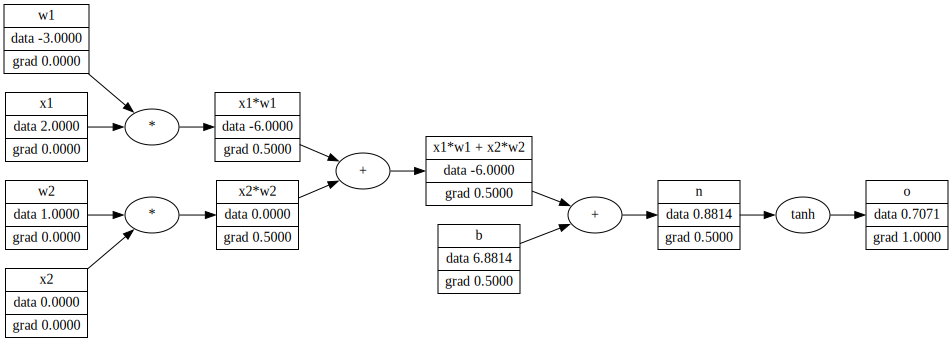

In [39]:
x1w1x2w2._backward()
draw_dot(o)

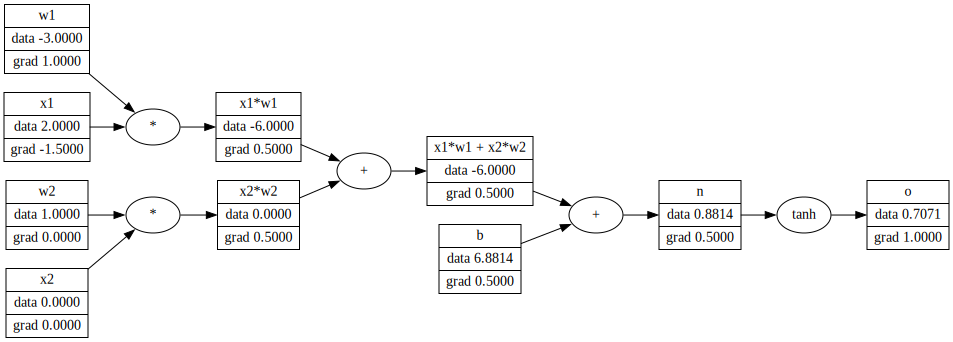

In [40]:
x1w1._backward()
draw_dot(o)

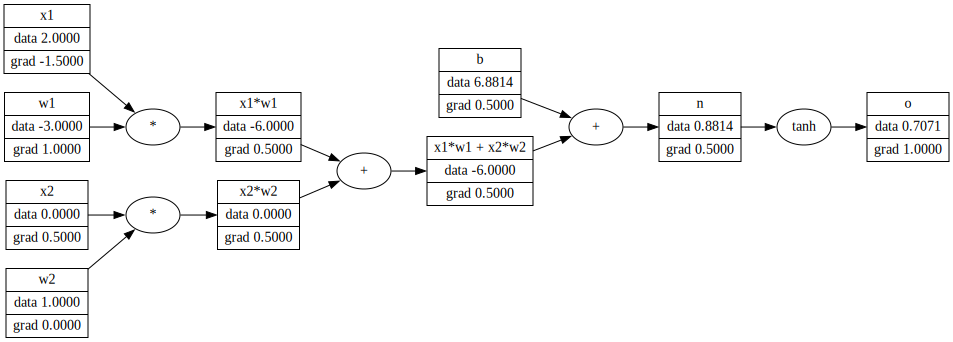

In [41]:
# call backward() to update all gradients at once


# input neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias
b = Value(6.881373, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

# cell body agg input
n = x1w1x2w2 + b; 
n.label = 'n'

o = n.tanh(); o.label='o'


o.backward()
draw_dot(o)

## Make exp an operator 

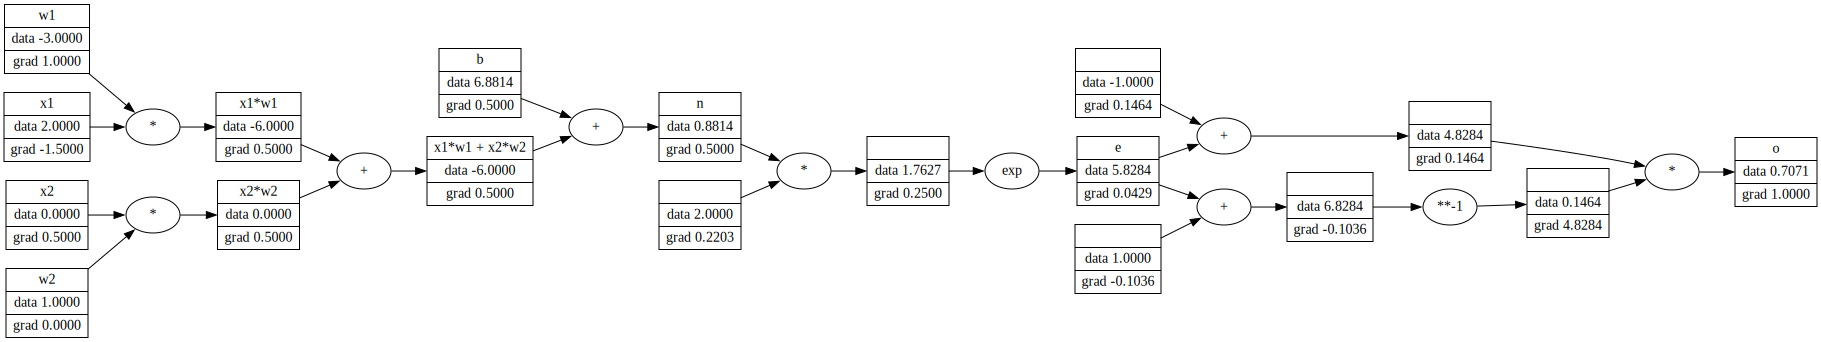

In [42]:
# input neuron
# migrograd is only scaler value engine, not for arrays!
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias
b = Value(6.881373, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
# cell body agg input
n = x1w1x2w2 + b; 
n.label = 'n'

# not use tanh, but exp -> equivalent to tanh
# OPERATION with forward and backward PASS
# level of operation is up to you, +,-,**, tanh, relu, ATOMIC operation
# input -> output = func(input)
# backward pass is just backward derivative, chain it up
e = (2*n).exp(); e.label='e'
o = (e-1)/(e+1); o.label='o'

# draw dot
o.grad = 1.0
o.backward()
draw_dot(o)

# 5. automatic differentiation in torch

In [6]:
# torch has the function backward() to update gradients of all tensors 
import torch

# torch.Tensor([2.0]) dtype is float by default
# requires_grad: if autograd should record operations on this tensor

x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813]).double(); w2.requires_grad = True

n = x1*w1 + x2*w2 + b; 
o = torch.tanh(n)

# .data returns Tensor; .data.item() strips away the Tensor wrap and returns the value
print (o.data.item())


0.7070699720278941


In [7]:
# after initalize, x2.grad is none
x1.grad

In [8]:
x1.data

tensor([2.], dtype=torch.float64)

In [9]:
o.backward()

print('----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

----
x2 0.5000520546564731
w2 0.0
x1 -1.5001561639694192
w1 1.0001041093129461


# 6. automatic differentiation in tensorflow

In [43]:
import tensorflow as tf

In [44]:
x1 = tf.constant([2.0])
x2 = tf.constant([0.0])
w1 = tf.Variable([-3.0])
w2 = tf.Variable([1.0])
b = tf.Variable([6.8813])

n = x1*w1 + x2*w2 + b; 
n

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8813], dtype=float32)>

In [45]:
o = tf.math.tanh(n)
o

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.70707005], dtype=float32)>

In [46]:
o.numpy().item()

0.7070700526237488

In [47]:
x1 = tf.constant([2.0])
x2 = tf.constant([0.0])
w1 = tf.Variable([-3.0])
w2 = tf.Variable([1.0])
b = tf.Variable([6.8813])

# tensorflow's autograd does not have .backward(), it relies on GradientTape to watch the tensor

with tf.GradientTape(watch_accessed_variables=False, persistent=True) as tape:
    tape.watch([x1, x2, w1, w2, b])
    n = x1*w1 + x2*w2 + b; 
    o = tf.math.tanh(n)
    
do_dx1 = tape.gradient(o, x1)
do_dx2 = tape.gradient(o, x2)
do_dw1 = tape.gradient(o, w1)
do_dw2 = tape.gradient(o, w2)
do_db  = tape.gradient(o, b)

print (o.numpy().item())
print('----')
print ("x1", do_dx1.numpy().item())
print ("x2", do_dx2.numpy().item())
print ("w1", do_dw1.numpy().item())
print ("w2", do_dw2.numpy().item())
print ("b", do_db.numpy().item())

0.7070700526237488
----
x1 -1.5001559257507324
x2 0.5000519752502441
w1 1.0001039505004883
w2 0.0
b 0.5000519752502441


# 7. MLP

In [48]:
# neural net is specific math abstract
class Neuron:
    
    # number of input coming to this neuron
    def __init__(self, n_in):
        # weight for each input, same bias
        self.w = [Value(random.uniform(-1,1)) for _ in range(n_in)]
        # trigger happiness
        self.b = Value(random.uniform(-1,1))
        
    # https://www.geeksforgeeks.org/__call__-in-python/
    # enables Python programmers to write classes where the instances behave like functions and can be called like a functio
    # n = Neuron(); n() or n(x) => invoke __call__
    def __call__(self, x):
        # w * x + b -> tanh -> out
        # dot product of w and x
        # feed 2 numbers to the Neuron as input
        # zip takes 2 iterator, iterate the tumple
        # activation
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        # this gives a list of weights + bias 
        # parameter is weight AND bias...
        return self.w + [self.b]
    
class Layer:
    
    # n_in defines the input to each Neuron
    # n_out defines the number of neurons in this layer 
    def __init__(self, n_in, n_out):
        self.neurons = [Neuron(n_in) for _ in range(n_out)]
    
    def __call__(self, x):
        # each Neuron takes n_in, and has n_out
        # each layer has a list of Neuron
        outs = [n(x) for n in self.neurons]
        # if a layer has a single neuron, return the Neuron, else, return the list
        return outs[0] if len(outs)==1 else outs
    
        
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
        
# multi-layer perception
class MLP:
    
    # n_in defines the number of neurons in the first layer (input)
    # n_out defines the number of neurons in each later layer, n_outs is a list of layers
    def __init__(self, n_in, n_outs):
        size = [n_in] + n_outs
        # the n_out of current layer is n_in for next layer
        # fully connected NN
        self.layers = [Layer(size[i], size[i+1]) for i in range(len(n_outs))]
    
    # x is a list of 
    def __call__(self, x):
        for layer in self.layers:
            # layer is Layer, Layer(x) is to call n(x) in sequence
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
        

In [49]:
neuron = Neuron(3)
neuron.w

[Value(data=0.3881160484826891, _op=, label=),
 Value(data=-0.15693349023222614, _op=, label=),
 Value(data=0.16807553676917153, _op=, label=)]

In [50]:
neuron.b

Value(data=-0.5181085482430288, _op=, label=)

In [51]:
xs = [1.0]
neuron(xs)

Value(data=-0.1292652086987592, _op=tanh, label=)

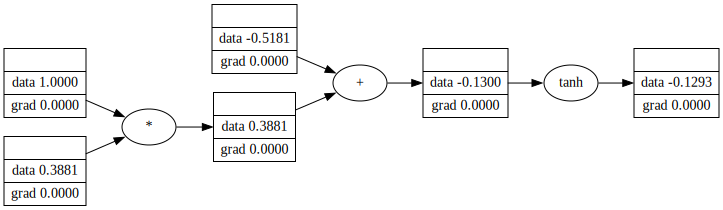

In [52]:
# left we have 1 weight
draw_dot(neuron(xs))

In [53]:
xs = [1.0, 2.0, 3.0]
neuron(xs)

Value(data=0.06029390704448561, _op=tanh, label=)

In [54]:
layer = Layer(2, 3)
# this layer has 3 neurons, each neuron has 2 input
for neuron in layer.neurons:
    print (neuron.w)

[Value(data=-0.7982881295742965, _op=, label=), Value(data=0.21181420036863563, _op=, label=)]
[Value(data=-0.7497782653842755, _op=, label=), Value(data=0.555544388931462, _op=, label=)]
[Value(data=-0.9464441374064965, _op=, label=), Value(data=0.5089774092959138, _op=, label=)]


In [55]:
nn = MLP(2, [3, 4])
# this mlp has 2 layers
# first layer 2 in, 3 out
# second layer 3 in, 4 out 
for layer in nn.layers:
    print ('\t', layer)
    for neuron in layer.neurons:
        print ('\t\t', neuron)
        print ('\t\t', neuron.w)

		 [Value(data=0.2433628928010092, _op=, label=), Value(data=-0.7551841903930812, _op=, label=)]
		 [Value(data=0.3136327527830496, _op=, label=), Value(data=0.1673093452664174, _op=, label=)]
		 [Value(data=-0.3963744139076282, _op=, label=), Value(data=0.5531002947326045, _op=, label=)]
		 [Value(data=-0.8890517129288229, _op=, label=), Value(data=-0.4074469200671813, _op=, label=), Value(data=-0.10151646749100962, _op=, label=)]
		 [Value(data=-0.9941308841542051, _op=, label=), Value(data=0.5235207826560115, _op=, label=), Value(data=0.40059567697003273, _op=, label=)]
		 [Value(data=-0.3957439769632747, _op=, label=), Value(data=-0.7021758473360142, _op=, label=), Value(data=0.3531180349775369, _op=, label=)]
		 [Value(data=0.824463971413687, _op=, label=), Value(data=-0.7559149986155553, _op=, label=), Value(data=-0.06125339835043553, _op=, label=)]


# 8. backpropagation to update gradient in MLP manually

In [56]:
# 3 input neuron, 4 layers, 4 neuron, 2 neuron, 1 neuron
nn = MLP(3, [4, 2, 1])

In [57]:
# backpropagate it to adjust the weights! 

xs = [
 [2.0, 3.0, -1.0],
 [3.0, -1.0, 0.5],
 [0.5, 1.0, 1.0],
 [1.0, 1,0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]

ys_preds = [nn(x) for x in xs]

# using random weights
ys_preds 

[Value(data=-0.41795164648933636, _op=tanh, label=),
 Value(data=-0.31924794670483636, _op=tanh, label=),
 Value(data=-0.6910950543587047, _op=tanh, label=),
 Value(data=-0.6103003342182711, _op=tanh, label=)]

In [58]:
# tune the weight
# calculate the single number LOSS to tweak the weight
# MSE loss
# ypt: ground truth
# yout: y output 
# we want to minimize the LOSS
loss = sum(((y_pred - y_gt)**2 for y_gt, y_pred in zip(ys, ys_preds)), Value(0.0))
loss

Value(data=5.162499661672529, _op=+, label=)

In [59]:
nn.parameters()

[Value(data=0.551379553277749, _op=, label=),
 Value(data=0.7490087095746107, _op=, label=),
 Value(data=-0.43403075140763003, _op=, label=),
 Value(data=0.7074450356615738, _op=, label=),
 Value(data=-0.01206263795284257, _op=, label=),
 Value(data=0.32501695529977837, _op=, label=),
 Value(data=0.6094150264483404, _op=, label=),
 Value(data=-0.3014303221801877, _op=, label=),
 Value(data=-0.853309856475374, _op=, label=),
 Value(data=0.46732970133208007, _op=, label=),
 Value(data=0.34489886595936126, _op=, label=),
 Value(data=0.42529890549826344, _op=, label=),
 Value(data=0.2706143507663419, _op=, label=),
 Value(data=-0.7525451396907292, _op=, label=),
 Value(data=-0.20228788241586804, _op=, label=),
 Value(data=0.5505821706267433, _op=, label=),
 Value(data=-0.03905953456650235, _op=, label=),
 Value(data=0.4369540838294961, _op=, label=),
 Value(data=0.9501544249929039, _op=, label=),
 Value(data=0.3874038860336424, _op=, label=),
 Value(data=0.8075897261481007, _op=, label=),


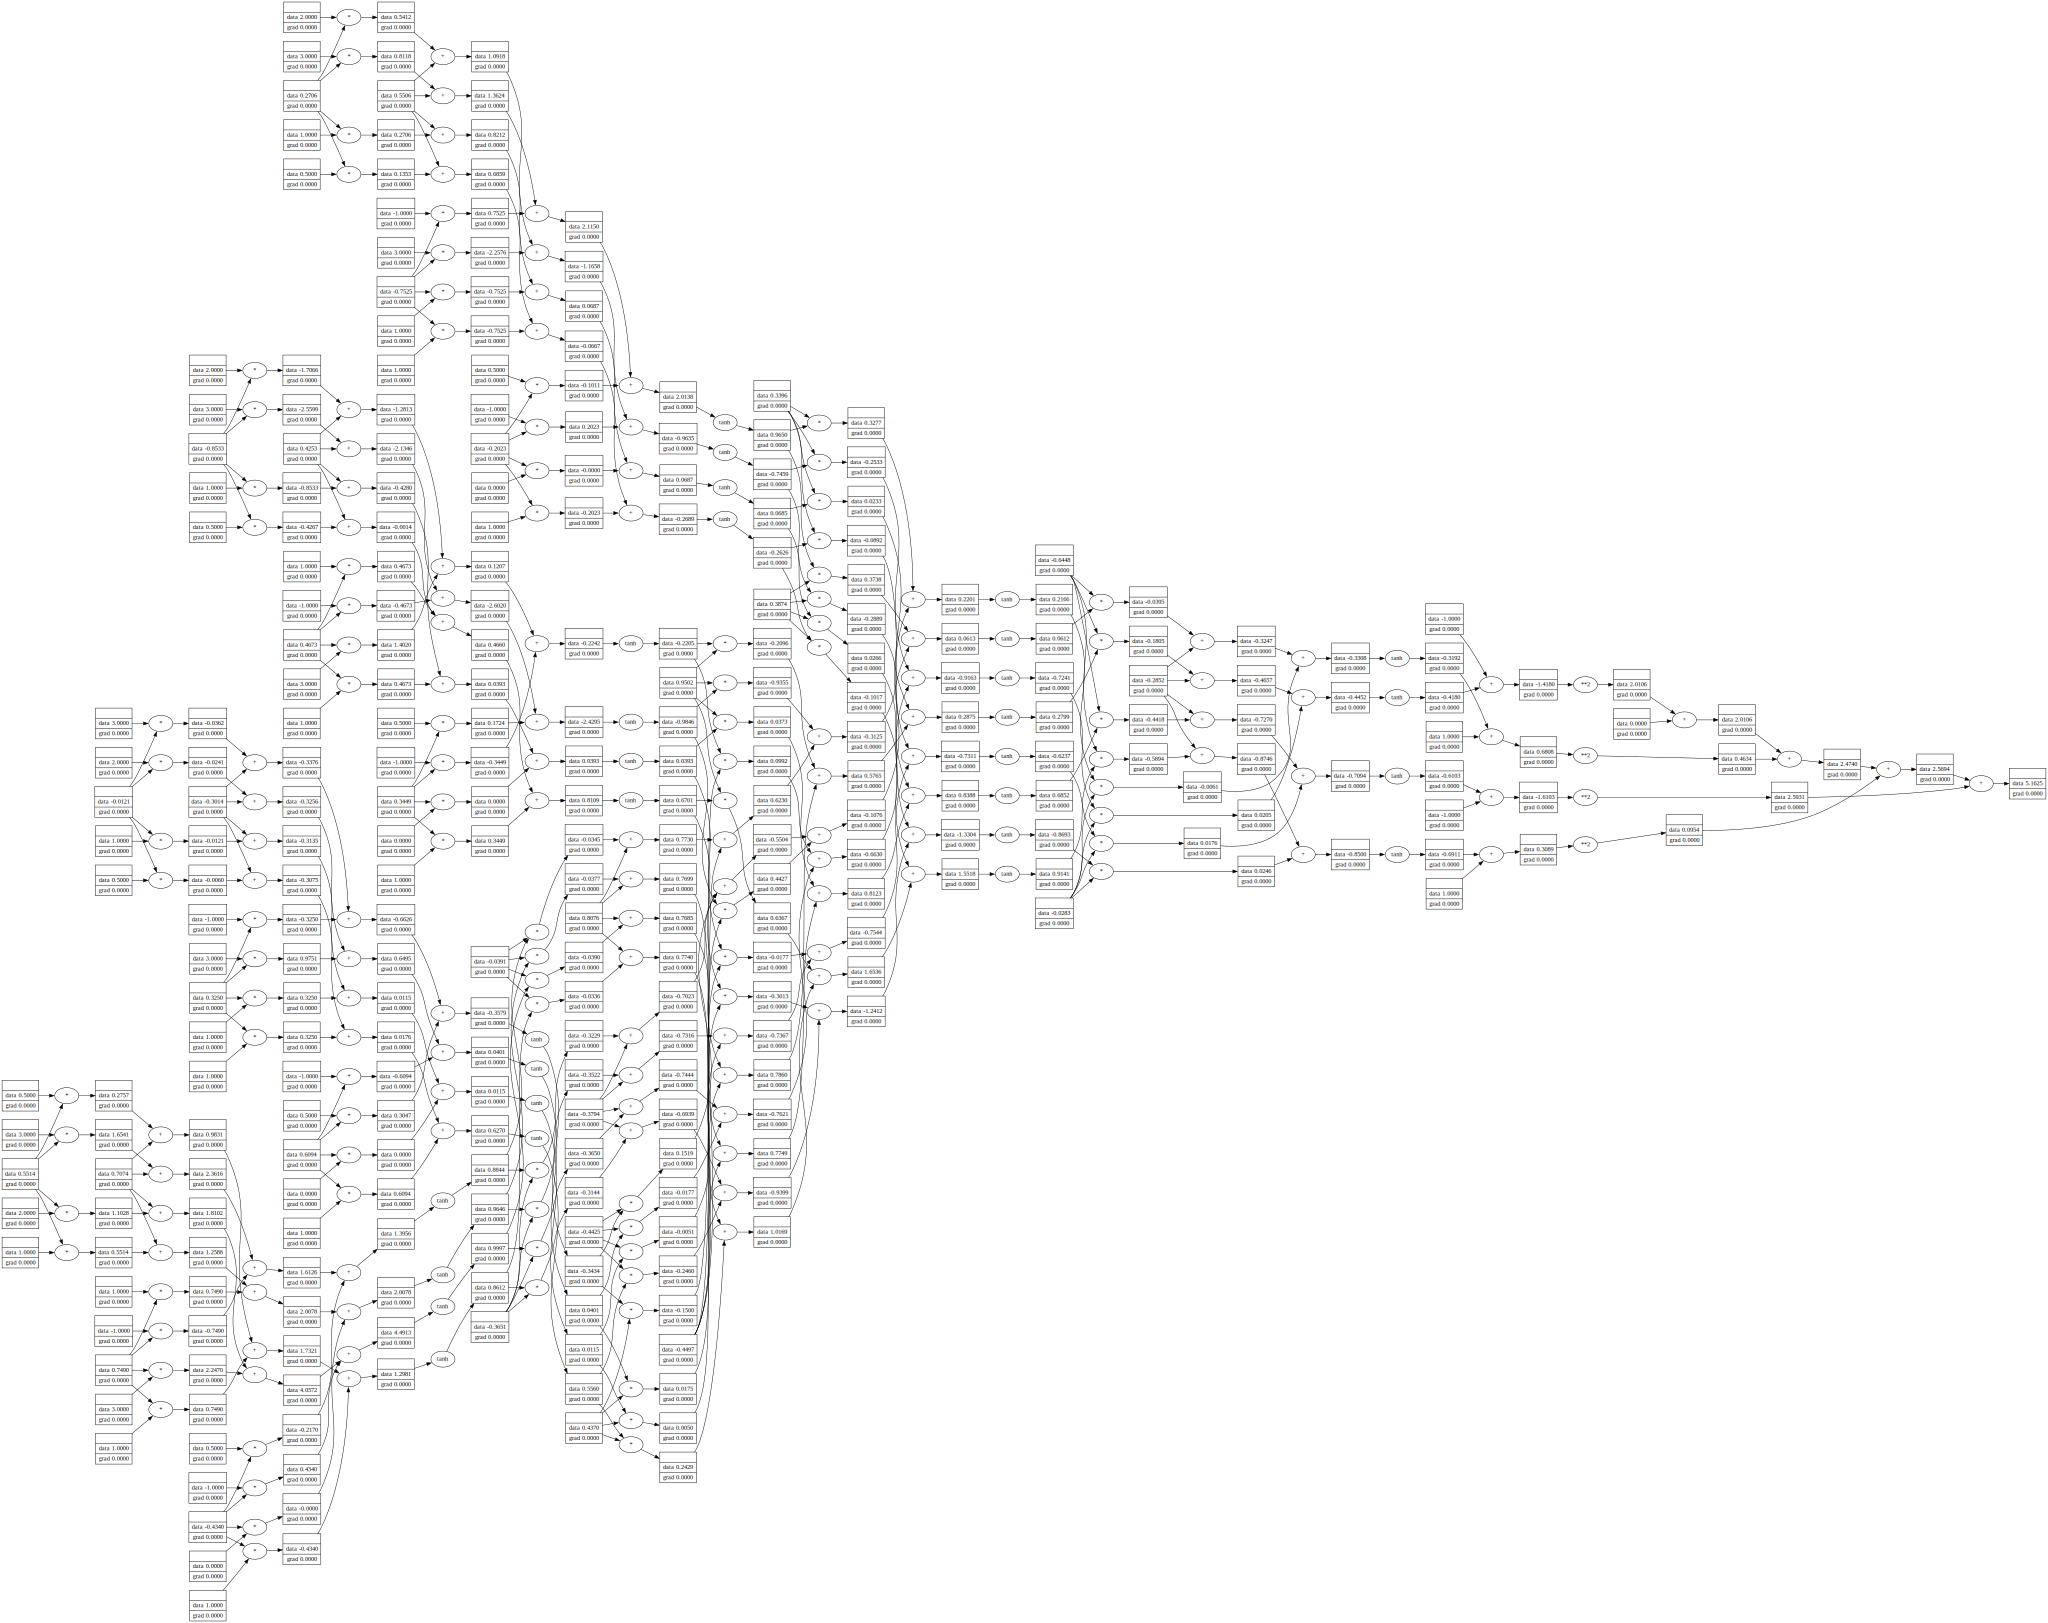

In [60]:
draw_dot(loss)

In [61]:
# make loss for the loss
# loss is a operatfion from other values, which we can also backward derivative! 
loss.backward()

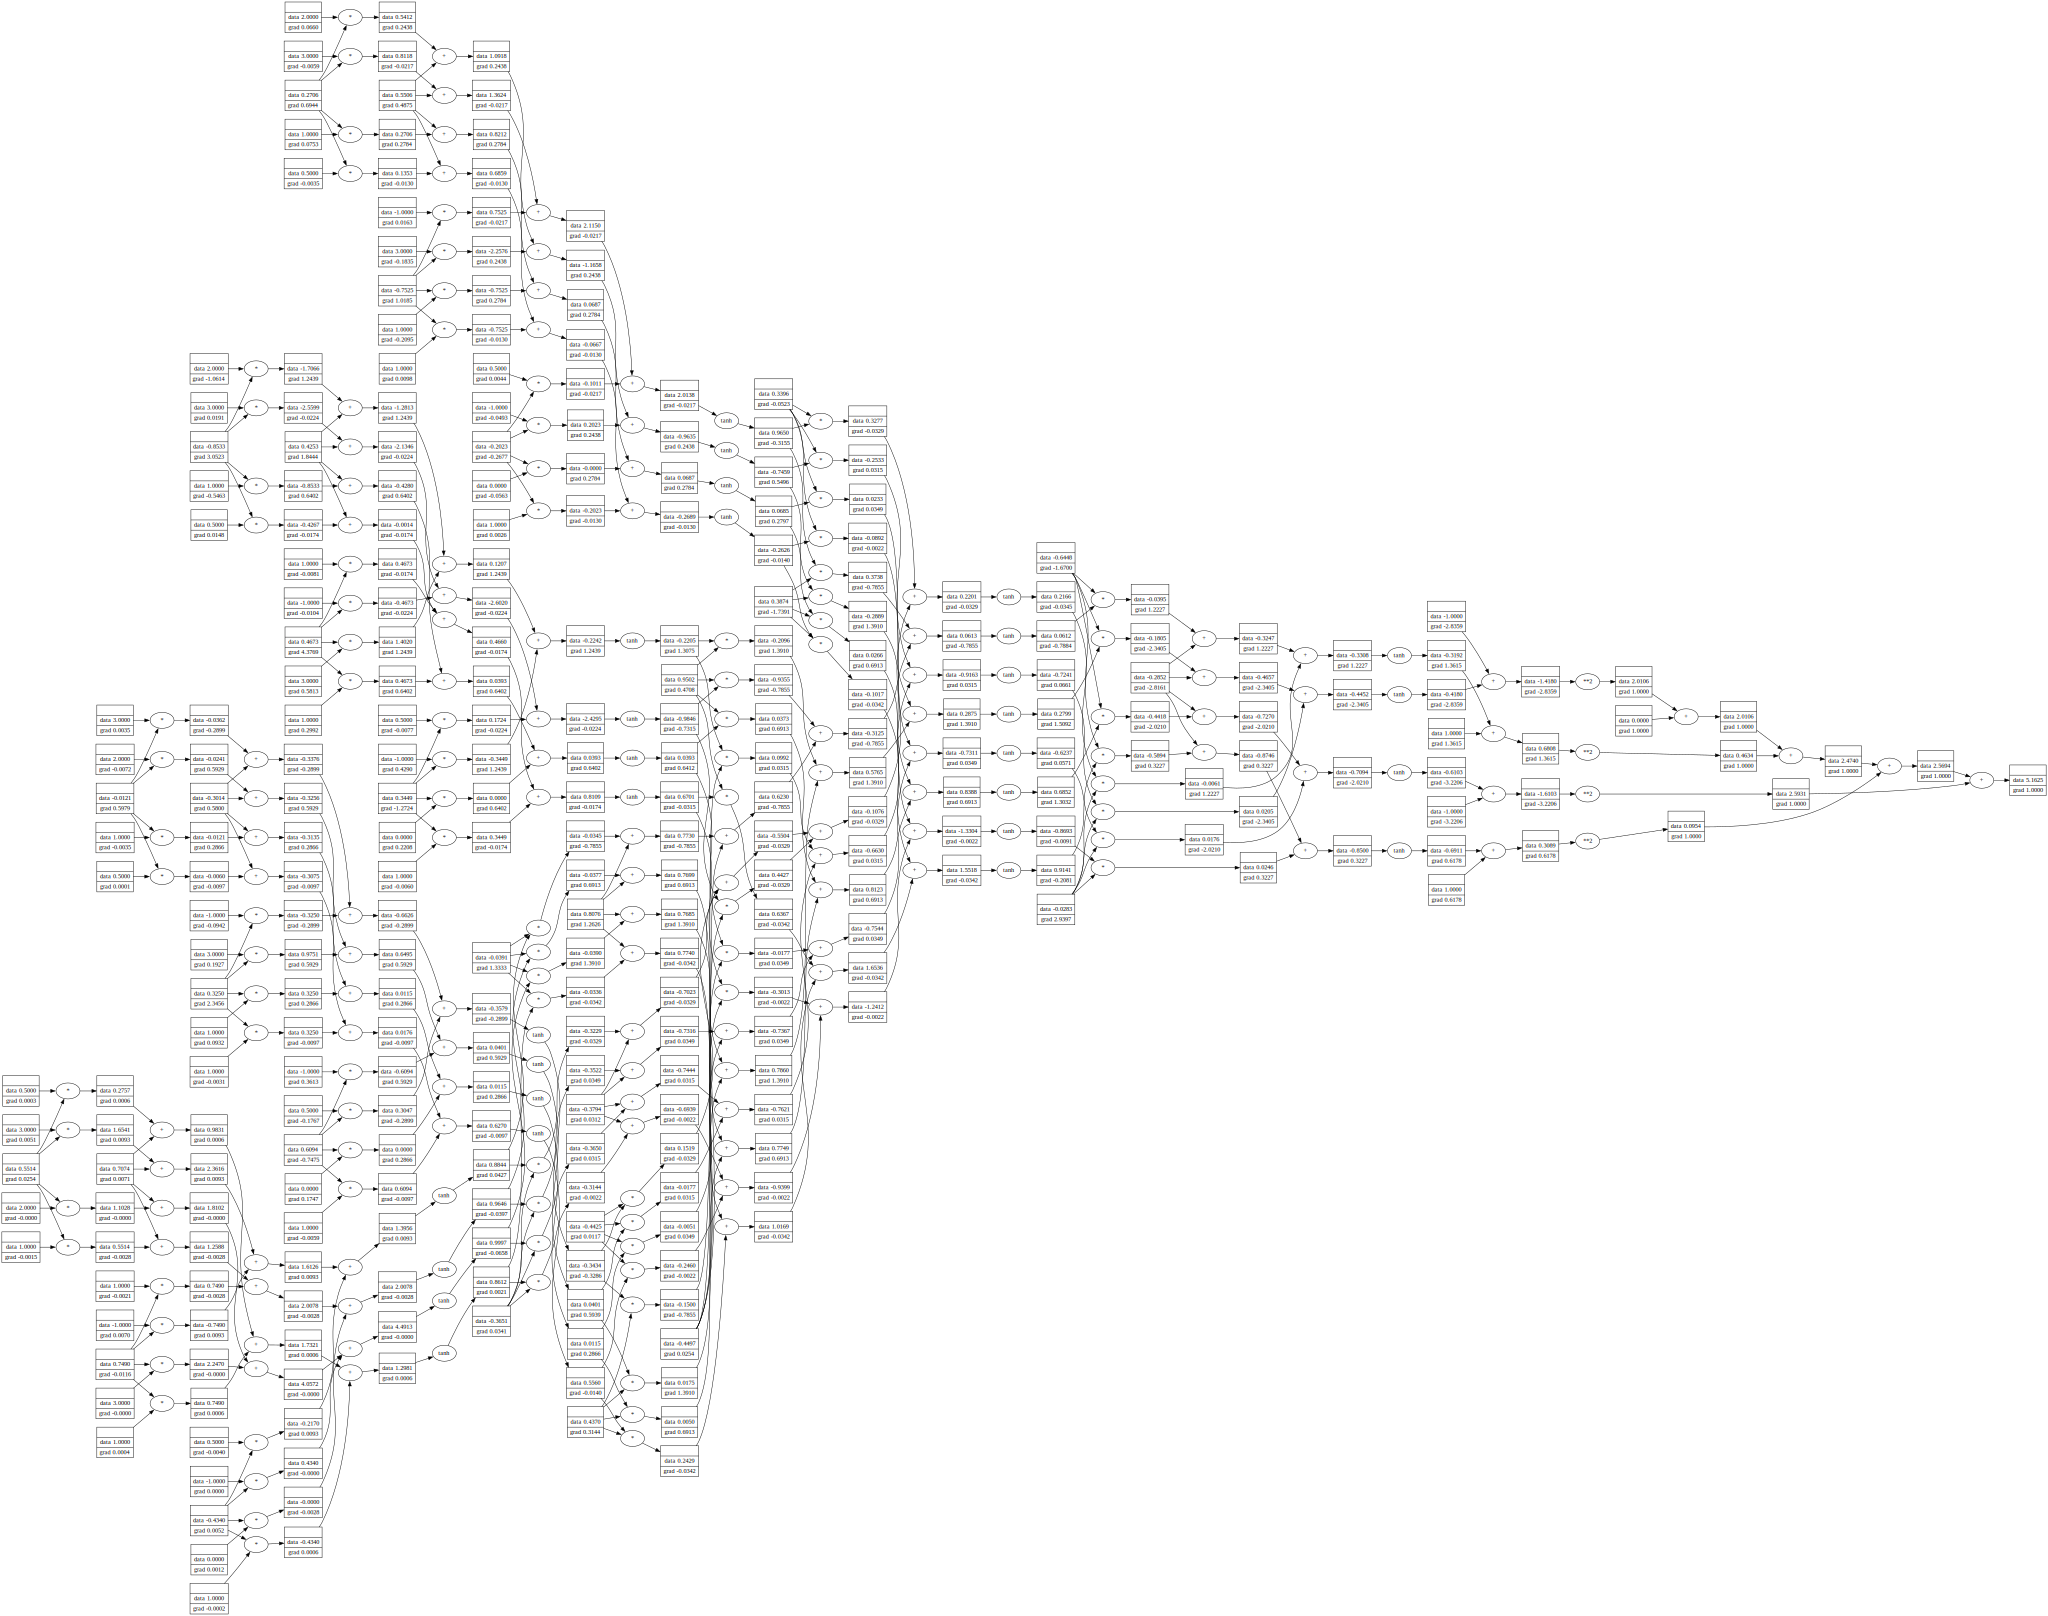

In [62]:
# all the gradients will be updated!
draw_dot(loss)

In [63]:
# look at the first layer 
# grad is negative influence 
# gradients on the input data (x,y), input data is fixed, not changable, we do have gradient for THEM
# we care about weights, the parameters of NN
nn.layers[0].neurons[0].w[0].grad

0.025354108866371787

In [64]:
# parameters of nn is not changed after we do loss.backward 
# although we can calculate the derivative after loss.backward for each param
nn.parameters()

[Value(data=0.551379553277749, _op=, label=),
 Value(data=0.7490087095746107, _op=, label=),
 Value(data=-0.43403075140763003, _op=, label=),
 Value(data=0.7074450356615738, _op=, label=),
 Value(data=-0.01206263795284257, _op=, label=),
 Value(data=0.32501695529977837, _op=, label=),
 Value(data=0.6094150264483404, _op=, label=),
 Value(data=-0.3014303221801877, _op=, label=),
 Value(data=-0.853309856475374, _op=, label=),
 Value(data=0.46732970133208007, _op=, label=),
 Value(data=0.34489886595936126, _op=, label=),
 Value(data=0.42529890549826344, _op=, label=),
 Value(data=0.2706143507663419, _op=, label=),
 Value(data=-0.7525451396907292, _op=, label=),
 Value(data=-0.20228788241586804, _op=, label=),
 Value(data=0.5505821706267433, _op=, label=),
 Value(data=-0.03905953456650235, _op=, label=),
 Value(data=0.4369540838294961, _op=, label=),
 Value(data=0.9501544249929039, _op=, label=),
 Value(data=0.3874038860336424, _op=, label=),
 Value(data=0.8075897261481007, _op=, label=),


In [65]:
# we update param with the value's gradient 
lr = 0.01
# if lr is too large, overSTEP; we only know its local gradient -> loss will BLOW up
# converge :) 
for p in nn.parameters():
    p.data += -lr * p.grad # parameter has its own grad. parameter IS weight, loss, thus negative
nn.parameters()

[Value(data=0.5511260121890853, _op=, label=),
 Value(data=0.7491248319447079, _op=, label=),
 Value(data=-0.43408314800994124, _op=, label=),
 Value(data=0.7073744424042983, _op=, label=),
 Value(data=-0.018042053936401375, _op=, label=),
 Value(data=0.30156073307379005, _op=, label=),
 Value(data=0.6168902332781561, _op=, label=),
 Value(data=-0.3072301882008574, _op=, label=),
 Value(data=-0.8838325622836282, _op=, label=),
 Value(data=0.42356071371754234, _op=, label=),
 Value(data=0.35762328901130724, _op=, label=),
 Value(data=0.40685498108955775, _op=, label=),
 Value(data=0.2636702200390908, _op=, label=),
 Value(data=-0.7627305158051377, _op=, label=),
 Value(data=-0.19961049720044452, _op=, label=),
 Value(data=0.5457076302680992, _op=, label=),
 Value(data=-0.05239294963903121, _op=, label=),
 Value(data=0.43381024476619207, _op=, label=),
 Value(data=0.9454459599921883, _op=, label=),
 Value(data=0.40479451167285335, _op=, label=),
 Value(data=0.7949635165169865, _op=, labe

In [66]:
# after we change the param, we expect the loss to be smaller 
# loss has been lower in the forward pass when we do n(x)
# then we do this again, to change the weights!
ys_pred2 = [nn(x) for x in xs]

# using random weights
loss2 = sum(((y_pred - y_gt)**2 for y_gt, y_pred in zip(ys, ys_pred2)), Value(0.0))
loss2

# iterative 1. forward pass 2. backward gradient cal 3. improve weight

Value(data=4.48089498848973, _op=+, label=)

# 9. backpropagation to update gradient in MLP programatically

In [67]:
nn = MLP(3, [4, 2, 1])
xs = [
 [2.0, 3.0, -1.0],
 [3.0, -1.0, 0.5],
 [0.5, 1.0, 1.0],
 [1.0, 1,0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]

In [68]:
lr = 0.2
iterations = 30

for k in range(iterations):
    # forward pass by passing x into MLP
    y_preds = [nn(x) for x in xs]
    loss = sum(((y_pred - y_gt)**2 for y_gt, y_pred in zip(ys, y_preds)), Value(0.0))
    
    # reset p.grad to zero before backward()
    # WHY? because we accumulate change to the grad, mathmathetically, it does not have memory
    for p in nn.parameters():
        p.grad = 0.
        
    # backward pass
    loss.backward()
    
    # updates
    for p in nn.parameters():
        # minimize loss, thus minus the gradient
        p.data += -lr * p.grad # parameter has its own grad. parameter IS weight, loss, thus negative
    
    # we need to recompute the gradient each time we calculate the grad from the loss.grad 
    print (k, loss.data)

0 6.509221294128289
1 2.412260894541481
2 1.5602421072216421
3 2.8469493346044614
4 2.376096449537143
5 2.565394305016768
6 1.4297377020366484
7 0.2743565467587641
8 0.058737263794219396
9 0.046102750405945386
10 0.03791763793360958
11 0.03213915931707649
12 0.027828537026560275
13 0.024486814632081584
14 0.021821292664869124
15 0.019647563781000528
16 0.017843052146437072
17 0.016322832321410706
18 0.015026092704114336
19 0.013908103423772411
20 0.012935219765051121
21 0.012081650672678926
22 0.011327299884036381
23 0.010656283524170272
24 0.010055887979379077
25 0.00951582218956237
26 0.009027671498468448
27 0.008584492357157521
28 0.008180507265300552
29 0.007810872212688438


In [69]:
ys

[1.0, -1.0, -1.0, 1.0]

In [70]:
y_preds

[Value(data=0.9633640274773699, _op=tanh, label=),
 Value(data=-0.9682051522293607, _op=tanh, label=),
 Value(data=-0.9586927356580318, _op=tanh, label=),
 Value(data=0.9387507118585516, _op=tanh, label=)]

In [71]:
# already a lot of parameters with this very few layers
nn.parameters()

[Value(data=-0.11555866591525718, _op=, label=),
 Value(data=0.6685227489012451, _op=, label=),
 Value(data=-1.2189607949485355, _op=, label=),
 Value(data=-0.27138584066238725, _op=, label=),
 Value(data=-0.015589562353769227, _op=, label=),
 Value(data=-0.4912066374244187, _op=, label=),
 Value(data=1.2136086330262066, _op=, label=),
 Value(data=0.09343638159922582, _op=, label=),
 Value(data=0.8170471090368582, _op=, label=),
 Value(data=0.11002011759087893, _op=, label=),
 Value(data=-1.5202818943964218, _op=, label=),
 Value(data=-0.2916714310428701, _op=, label=),
 Value(data=0.23766485432466633, _op=, label=),
 Value(data=1.1345596598264696, _op=, label=),
 Value(data=-0.5049921077312945, _op=, label=),
 Value(data=-0.8891094651972768, _op=, label=),
 Value(data=0.9143618102545285, _op=, label=),
 Value(data=-0.6521754576092829, _op=, label=),
 Value(data=1.4588151445206325, _op=, label=),
 Value(data=0.20977175688633426, _op=, label=),
 Value(data=0.19518024803844894, _op=, lab

# 10. Exercise: support for softmax

In [72]:
# without referencing our code/video __too__ much, make this cell work
# you'll have to implement (in some cases re-implemented) a number of functions
# of the Value object, similar to what we've seen in the video.
# instead of the squared error loss this implements the negative log likelihood
# loss, which is very often used in classification.

# this is the softmax function
# https://en.wikipedia.org/wiki/Softmax_function
def softmax(logits):
    counts = [logit.exp() for logit in logits]
    denominator = sum(counts, Value(0))
    out = [c / denominator for c in counts]
    return out

# this is the negative log likelihood loss function, pervasive in classification
logits = [Value(0.0), Value(3.0), Value(-2.0), Value(1.0)]
probs = softmax(logits)
loss = -probs[3].log() # dim 3 acts as the label for this input example
loss.backward()
print(loss.data)

ans = [0.041772570515350445, 0.8390245074625319, 0.005653302662216329, -0.8864503806400986]
for dim in range(4):
    ok = 'OK' if abs(logits[dim].grad - ans[dim]) < 1e-5 else 'WRONG!'
    print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {logits[dim].grad}")


2.1755153626167147
OK for dim 0: expected 0.041772570515350445, yours returns 0.041772570515350445
OK for dim 1: expected 0.8390245074625319, yours returns 0.8390245074625319
OK for dim 2: expected 0.005653302662216329, yours returns 0.005653302662216329
OK for dim 3: expected -0.8864503806400986, yours returns -0.8864503806400986
